# コードのテスト
## predicter_base_predict.py の関数について
- 分類モデルの基本的なpredictについて

In [4]:
# モジュールimport
import os, sys
sys.path.append(r'C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py')
from predicter import base_predict
from transformer import get_train_valid_test, my_generator
from dataset import plot_log, prepare_data, util, plot_12task_log, util, pr_curve, set_split

import keras
import numpy as np
import pandas as pd
%matplotlib inline

output_dir = r'output_test\100x100\predict'


## base_predict.pred_from_1img
- 1件のファイルパスから予測実行し、確率最大のラベル表示し、確率最大のid返す

util.py: loaded as module file
D:\work\AI_Edge_Contest\object_detect\cropped_img\0\train_00000.jpg_#1.jpg


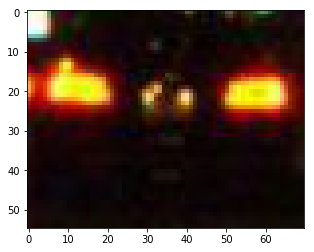

[[9.9936098e-01 5.0893109e-06 7.7061361e-07 4.3788397e-05 7.8612595e-07
  5.8857485e-04]]
classes: ['Car', 'Bicycle', 'Pedestrian', 'Signal', 'Signs', 'Truck']
max_pred_label :  Car


(0, 0.999361)

In [3]:
model = keras.models.load_model(r'D:\work\AI_Edge_Contest\object_detect\classes\trained_results\class_0_5_model_InceptionResNetV2+SE_epoch10_from_02_keras_py\finetuning.h5'
                                , compile=False)

pred_path = r'D:\work\AI_Edge_Contest\object_detect\cropped_img\0\train_00000.jpg_#1.jpg'
classes = ['Car', 'Bicycle', 'Pedestrian', 'Signal', 'Signs', 'Truck']
img_rows, img_cols = 331, 331
show_img=True

base_predict.pred_from_1img(model, pred_path, img_rows, img_cols, classes=classes, show_img=show_img)

## base_predict.pred_from_1X
- 1件の前処理済みの画像データから予測実行し、確率最大のラベル表示し、確率最大のid返す

In [5]:
from keras.preprocessing import image
model = keras.models.load_model(r'D:\work\AI_Edge_Contest\object_detect\classes\trained_results\class_0_5_model_InceptionResNetV2+SE_epoch10_from_02_keras_py\finetuning.h5'
                                , compile=False)

pred_path = r'D:\work\AI_Edge_Contest\object_detect\cropped_img\0\train_00000.jpg_#1.jpg'
classes = ['Car', 'Bicycle', 'Pedestrian', 'Signal', 'Signs', 'Truck']
img_rows, img_cols = 331, 331
show_img=True

img = image.load_img(pred_path, target_size=(img_rows, img_cols))
X = image.img_to_array(img)/255.0

base_predict.pred_from_1X(model, X, classes=classes)
base_predict.pred_from_1X(model, X)

predict_score: [[9.9936098e-01 5.0892913e-06 7.7061213e-07 4.3788314e-05 7.8612294e-07
  5.8857125e-04]]
classes: ['Car', 'Bicycle', 'Pedestrian', 'Signal', 'Signs', 'Truck']
max_pred_label:  Car
predict_score: [[9.9936098e-01 5.0892913e-06 7.7061213e-07 4.3788314e-05 7.8612294e-07
  5.8857125e-04]]


(0, 0.999361)

## base_predict.predict_tta
- albumentationsで水平反転,回転,切り抜き画像作成してTTA

In [4]:
from keras.preprocessing import image
model = keras.models.load_model(r'D:\work\AI_Edge_Contest\object_detect\classes\trained_results\class_0_5_model_InceptionResNetV2+SE_epoch10_from_02_keras_py\finetuning.h5'
                                , compile=False)

pred_path = r'D:\work\AI_Edge_Contest\object_detect\cropped_img\0\train_00000.jpg_#1.jpg'
img_rows, img_cols = 331, 331

img = image.load_img(pred_path, target_size=(img_rows, img_cols))
x = image.img_to_array(img)
print(x.shape)
pred = base_predict.predict_tta(model, x, TTA_rotate_deg=120, TTA_crop_num=5)
print(pred)

(331, 331, 3)
[8.3075833e-01 3.2036885e-04 7.2674896e-04 4.6048341e-03 2.7056644e-04
 1.6331911e-01]


## base_predict.pred_classes_generator
- 多クラス分類のgenerator からgenerator の指定ディレクトリの画像全件予測する

## base_predict.conf_matrix_from_pred_classes_generator
- pred_classes_generator() でだした値からconf_matrix.make_confusion_matrix() で混同行列作る

my_generator.py: loaded as module file
Found 338 images belonging to 11 classes.
conf_matrix.py: loaded as module file
y_pred_list_str: ['beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'other'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'other' 'beagle' 'other' 'beagle' 'shingo' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'other' 'beagle' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'shingo' 'beagle'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'boke' 'beagle' 'shingo' 'other' 'other' 'cat' 'cat' 'cat' 'cat'
 'comic_book' 'comic_book' 'comic_book' 'comic_book' 'other' 'marin'
 'c

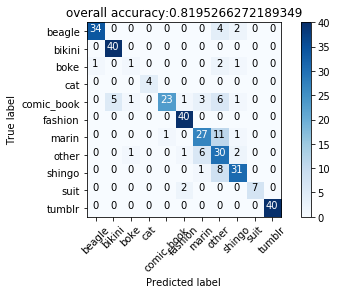

<Figure size 432x288 with 0 Axes>

In [3]:
model = keras.models.load_model(r'D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190122\finetuning.h5'
                                , compile=False)

train_data_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\train'
validation_data_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\validation'
val_samples = util.file_count(validation_data_dir, r'.JPG')+util.file_count(validation_data_dir, r'.PNG')+util.file_count(validation_data_dir, r'.jpg')+util.file_count(validation_data_dir, r'.png')

img_rows, img_cols, channels = 331, 331, 3
batch_size = 10
classes = ['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']

my_IDG_options={'rescale': 1.0/255.0
                 , 'horizontal_flip': True}

d_cls = get_train_valid_test.LabeledDataset([img_rows, img_cols, channels]
                                            , batch_size
                                            , valid_batch_size=batch_size
                                           )

d_cls.create_my_generator_flow_from_directory(train_data_dir
                                              , classes
                                              , valid_data_dir=validation_data_dir
                                              , color_mode='rgb'
                                              , class_mode='categorical'
                                              , my_IDG_options=my_IDG_options)

pred_df = base_predict.pred_classes_generator(model, d_cls.valid_gen,  steps=(val_samples//batch_size)+1, classes_list=classes)

base_predict.conf_matrix_from_pred_classes_generator(pred_df, classes, output_dir)

## base_predict.predict_tta_generator
- flowやflow_from_directory 済みのImageDataGenerator からTTA を実行

## base_predict.get_predict_generator_results
- 多クラス分類予測結果（スコア）のリスト とgenerator からデータフレームでファイル名と予測ラベル返す

my_IDG_options: {'rescale': 0.00392156862745098, 'horizontal_flip': True}
Found 338 images belonging to 11 classes.
conf_matrix.py: loaded as module file
y_pred_list_str: ['beagle' 'beagle' 'beagle' 'beagle' 'other' 'beagle' 'beagle' 'other'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'other' 'beagle' 'other' 'beagle' 'fashion' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'other' 'beagle' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'shingo' 'beagle'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'boke' 'beagle' 'boke' 'other' 'other' 'cat' 'cat' 'cat' 'cat'
 'comic_book' 'comic_book' 'comic_book'

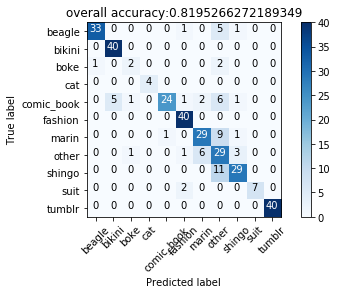

,Filename,PredictionLabel,PredictionScore
0,beagle\Boston_bull_IMG_9631.JPG,beagle,0.916
1,beagle\Brittany_spaniel_IMG_4224.JPG,beagle,0.698
2,beagle\Chihuahua_IMG_4561.JPG,beagle,1.0
3,beagle\Chihuahua_IMG_5361.JPG,beagle,0.995
4,beagle\Chihuahua_IMG_7405.JPG,other,0.667


<Figure size 432x288 with 0 Axes>

In [3]:
model = keras.models.load_model(r'D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190122\finetuning.h5'
                                , compile=False)

train_data_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\train'
validation_data_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\validation'
val_samples = util.file_count(validation_data_dir, r'.JPG')+util.file_count(validation_data_dir, r'.PNG')+util.file_count(validation_data_dir, r'.jpg')+util.file_count(validation_data_dir, r'.png')

img_rows, img_cols, channels = 331, 331, 3
batch_size = 10
classes = ['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']

my_IDG_options={'rescale': 1.0/255.0
                 , 'horizontal_flip': True}

d_cls = get_train_valid_test.LabeledDataset([img_rows, img_cols, channels]
                                            , batch_size
                                            , valid_batch_size=batch_size
                                           )

d_cls.create_my_generator_flow_from_directory(train_data_dir
                                              , classes
                                              , valid_data_dir=validation_data_dir
                                              , color_mode='rgb'
                                              , class_mode='categorical'
                                              , my_IDG_options=my_IDG_options)

# generatorのnextからTTAする場合
# validation set
# TTA
pred_tta = base_predict.predict_tta_generator(model, d_cls.valid_gen)
pred_tta_df = base_predict.get_predict_generator_results(pred_tta, d_cls.valid_gen, classes_list=classes)

# 出力先ディレクトリ
pred_output_dir = os.path.join(output_dir, 'prediction', 'valid_TTA')
os.makedirs(pred_output_dir, exist_ok=True)

# 予測結果のデータフレームから混同行列作成
base_predict.conf_matrix_from_pred_classes_generator(pred_tta_df, classes, pred_output_dir)

# 予測結果のデータフレーム出力
pred_tta_df.to_csv(os.path.join(pred_output_dir, 'pred.tsv'), sep='\t')
pred_tta_df.head()

## base_predict.pred_tta_from_paths
- 指定のファイルパス全件 predict_tta() で予測実行し、ファイルパス、確率最大のラベル名、scoreの予測結果のデータフレームを返す

In [5]:
%%time

output_dir = r'D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190310\train_all'
load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'), compile=False)

img_rows, img_cols, channels=331, 331, 3
classes = ['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']

# 出力先ディレクトリ
pred_output_dir = os.path.join(output_dir, 'prediction', '2018-08')
os.makedirs(pred_output_dir, exist_ok=True)

data_dir = r'D:\iPhone_pictures\2018-08'
img_paths = util.get_jpg_png_path_in_dir(data_dir)

# 1件づつpredictして、予測結果のデータフレームを返す
pred_df = base_predict.pred_tta_from_paths(load_model, img_paths, img_rows, img_cols, classes=classes, show_img=False
                                           , TTA=''
                                           , TTA_rotate_deg=0
                                           , TTA_crop_num=0, TTA_crop_size=[0, 0]
                                           , preprocess=1.0/255.0)

# 予測結果のデータフレーム出力
pred_df.to_csv(os.path.join(pred_output_dir, 'pred.tsv'), sep='\t')
print(pred_df.head())

jpg_png_count: 537
Processing D:/iPhone_pictures/2018-08/JCOM8277.PNG: 100%|████████████████████████████| 537/537 [01:08<00:00, 14.57it/s]
                                  Filename PredictionLabel  PredictionScore
0  D:/iPhone_pictures/2018-08/IMG_0457.PNG         fashion         0.871384
1  D:/iPhone_pictures/2018-08/IMG_2239.PNG         fashion         0.885098
2  D:/iPhone_pictures/2018-08/IMG_2937.JPG      comic_book         0.954106
3  D:/iPhone_pictures/2018-08/IMG_4460.JPG           other         0.692549
4  D:/iPhone_pictures/2018-08/IMG_5249.JPG         fashion         0.534056
Wall time: 1min 44s


## base_predict.copy_pred_img_by_pred_df
- 予測結果のデータフレームから、予測ラベルごとに出力先ディレクトリを分けて、予測した画像コピーする

In [2]:
output_dir = r'D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190310\train_all'

# 予測結果のデータフレーム
pred_output_dir = os.path.join(output_dir, 'prediction', '2018-08')
pred_df = pd.read_csv(os.path.join(pred_output_dir, 'pred.tsv'), sep='\t')

# 出力先ディレクトリ
pred_img_output_dir = os.path.join(output_dir, 'prediction_cp_img', '2018-08')
os.makedirs(pred_output_dir, exist_ok=True)

# 予測ラベルごとに出力先ディレクトリを分けて、予測した画像コピー
base_predict.copy_pred_img_by_pred_df(pred_img_output_dir, pred_df)

537it [00:02, 219.60it/s]
